In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import numpy as np
from sklearn.cluster import KMeans

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 55)

In [4]:
cd ../scripts/

/home/jds98/10 Academy/Week 1/Week-1-Project/scripts


In [5]:
import dataset_infos
import clean_transform as transf
import eda_functions as eda
import prerequisites as pre

In [6]:
cd ../notebooks/Figures/

/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures


## Load the data

In [7]:
df = pre.load_data()

In [8]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","

## Clean the data

In [9]:
df = pre.clean_data(df)

In [10]:
pre.data_infos(df)

 There are 149010 rows and 45 columns
The dataset contains 0.0 % missing values.


In [11]:
dfExp = df.drop(['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'IMEI','Dur. (ms).1', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'], axis=1)
dfExp.head()

,Bearer Id,MSISDN/Number,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B
0,"13,114,483,460,844,900,352.00","33,664,962,239.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00
1,"13,114,483,482,878,900,224.00","33,681,854,413.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00"
2,"13,114,483,484,080,500,736.00","33,760,627,129.00",D42335A,106.10,17.66,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,Samsung,Samsung Galaxy A8 (2018),751.00,695.00
3,"13,114,483,485,442,799,616.00","33,750,343,200.00",T21824A,106.10,17.66,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00",undefined,undefined,17.00,207.00
4,"13,114,483,499,480,700,928.00","33,699,795,932.00",D88865A,106.10,17.66,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,Samsung,Samsung Sm-G390F,607.00,604.00


## Outliers identification in db_behav and dealing with them

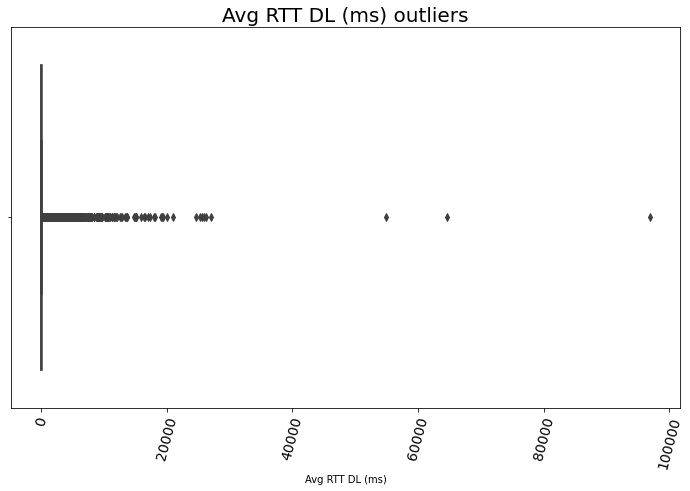

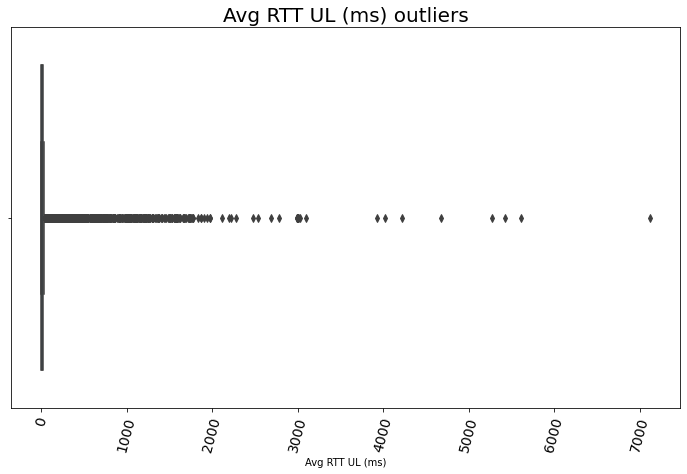

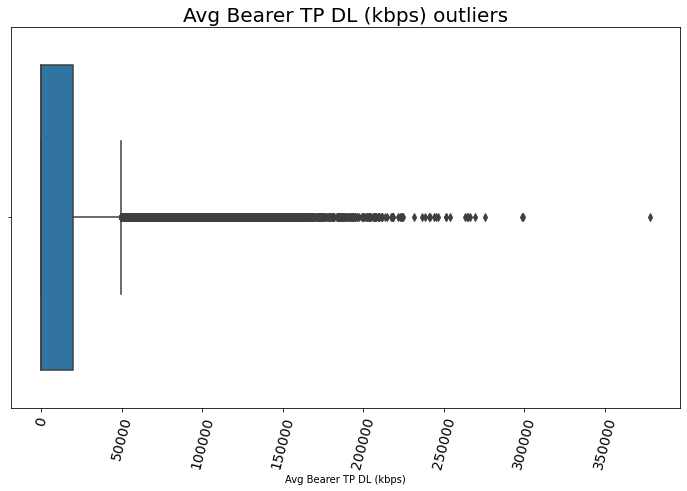

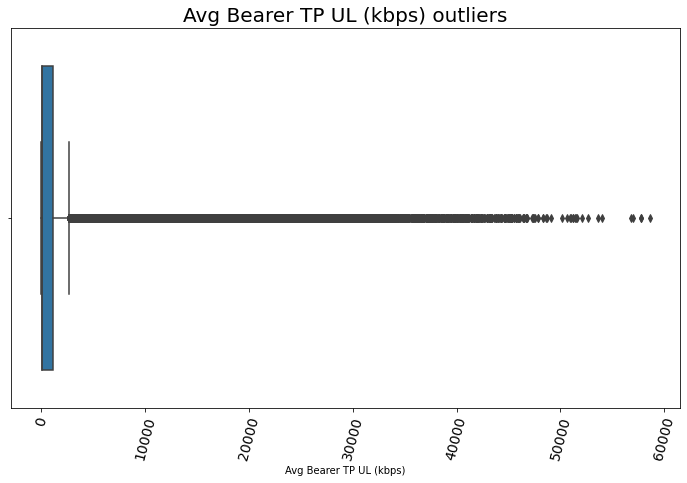

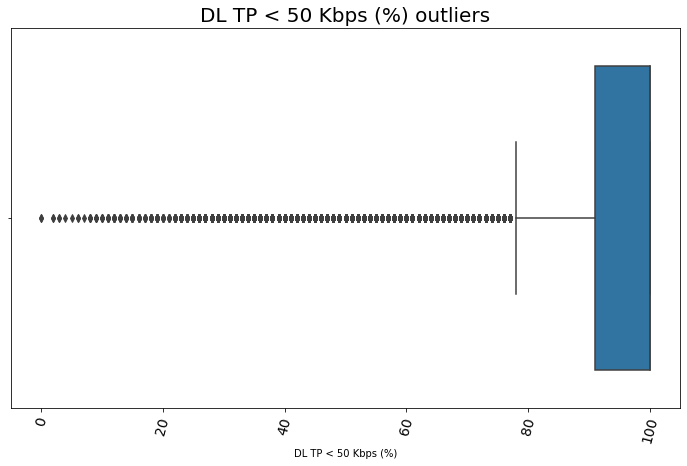

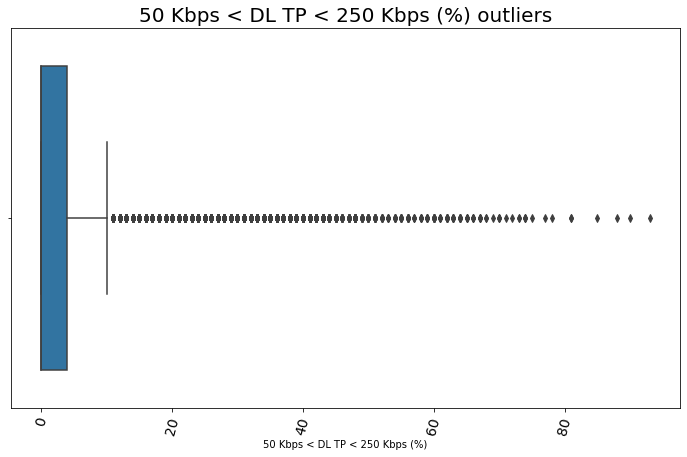

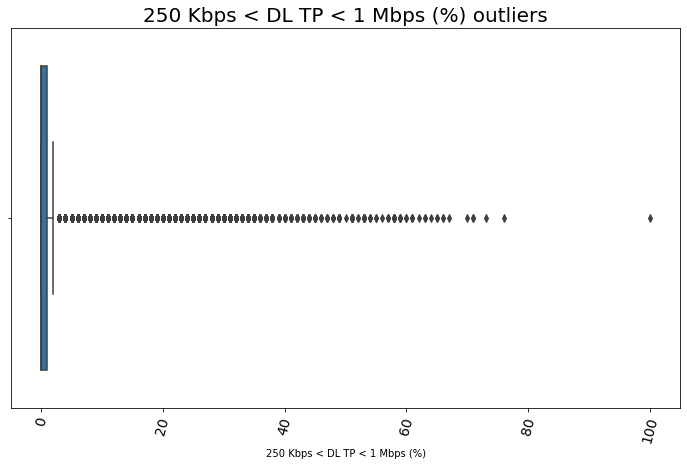

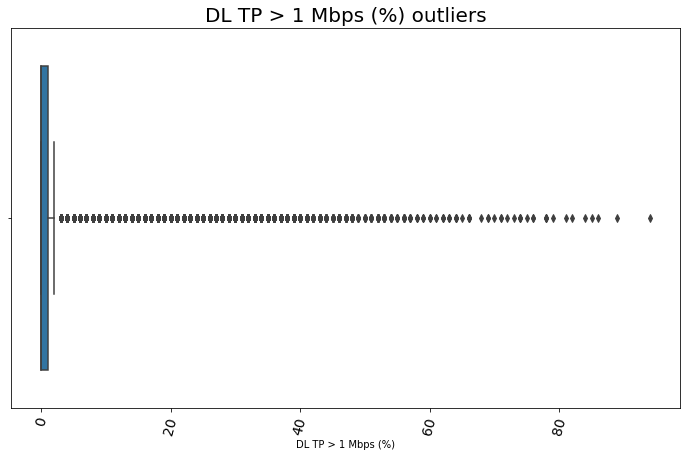

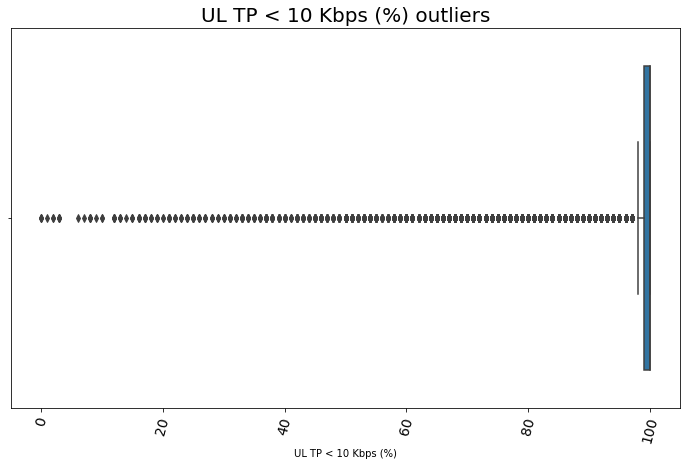

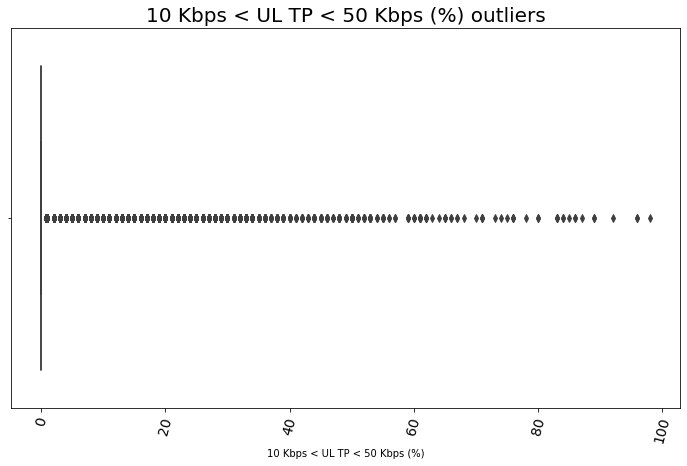

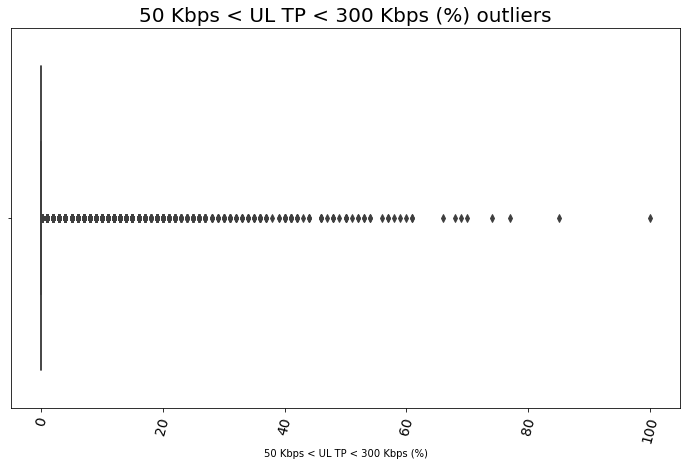

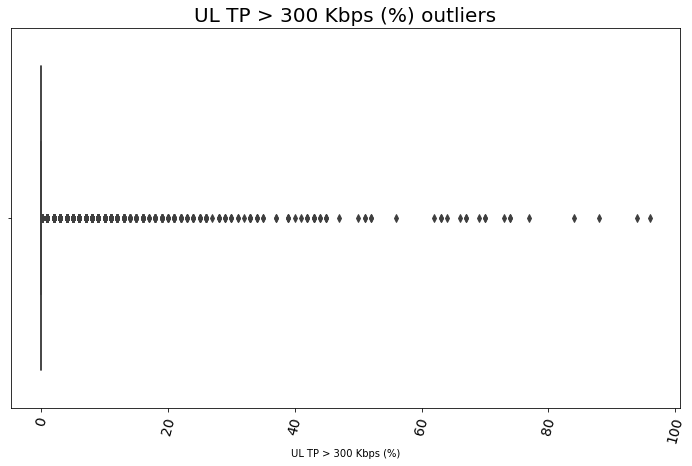

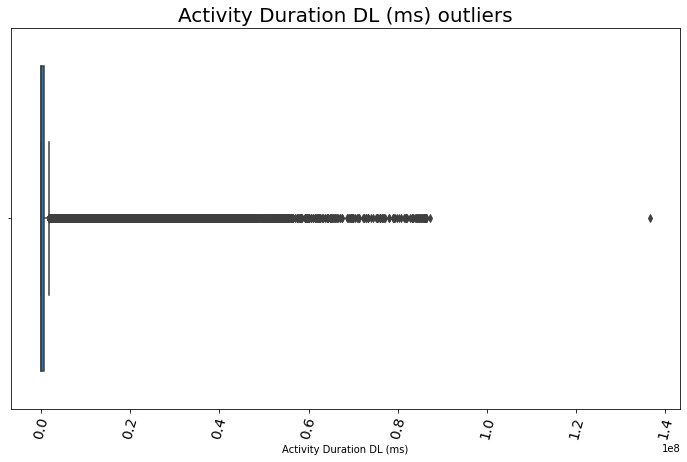

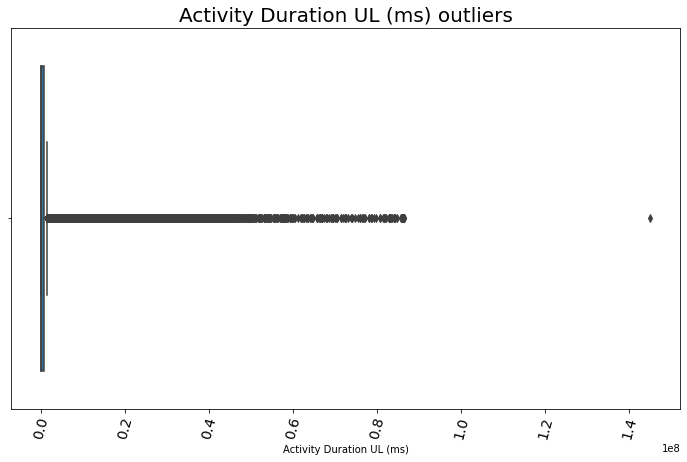

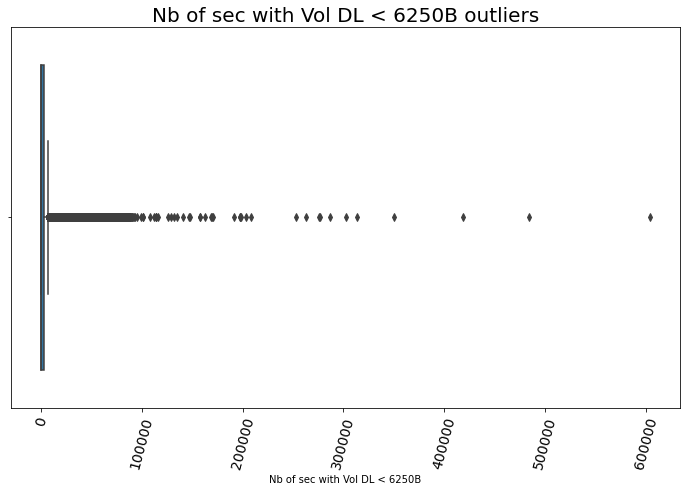

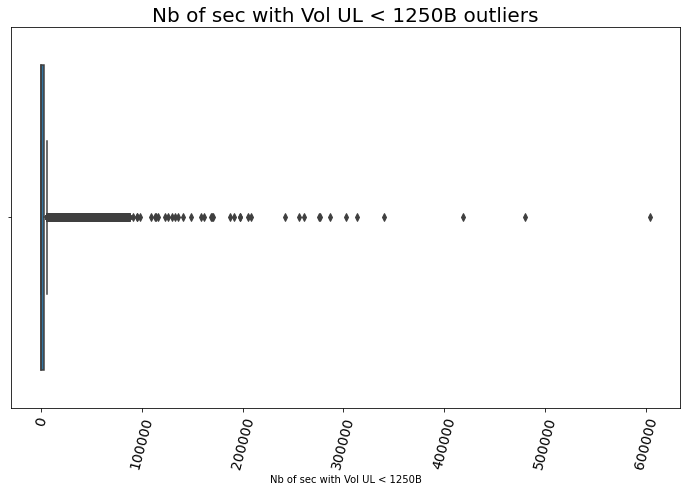

In [12]:
#### Boxplot to visualize the ouliers
dfExp_num = (dfExp.select_dtypes('float')).drop(['Bearer Id', 'MSISDN/Number'], axis=1)
for col in dfExp_num.columns:
    eda.plot_box(dfExp_num, col, f'{col} outliers')

In [13]:
### Fix the outliers by replacing them by their median values
for col in dfExp_num.columns:
    dfExp_num[col] = eda.fix_outlier(dfExp_num, col, 0.90)

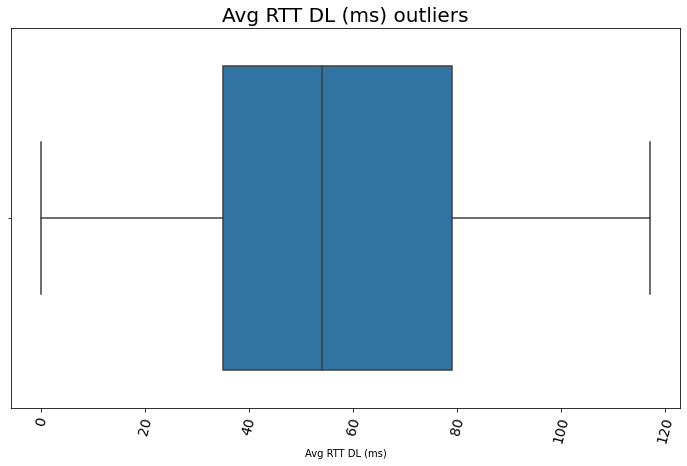

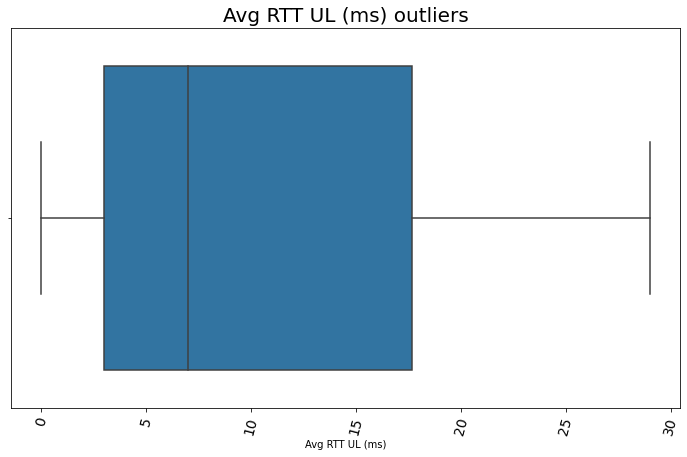

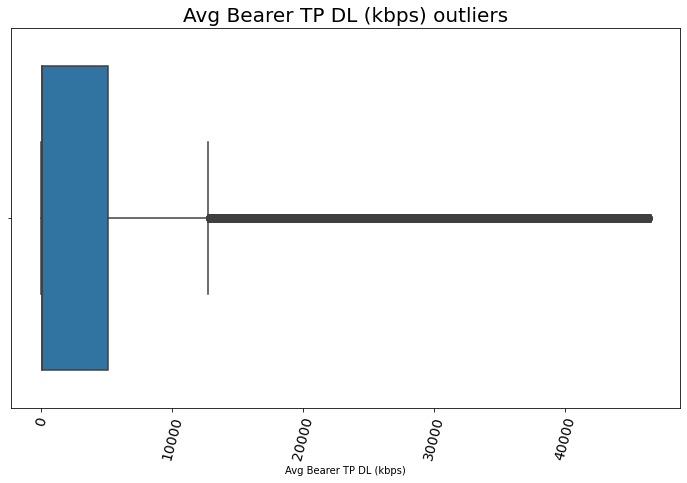

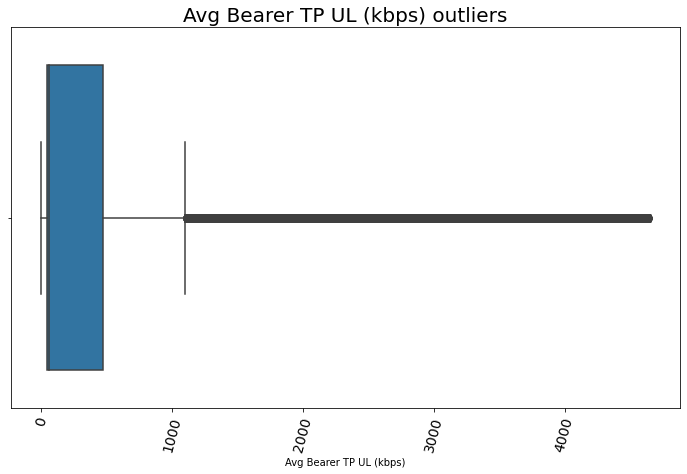

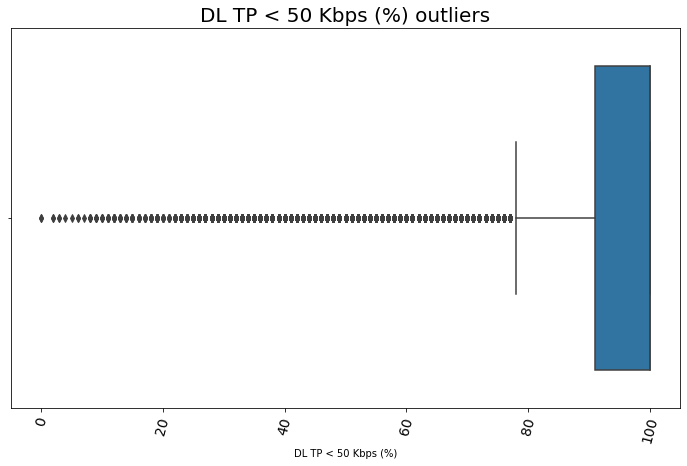

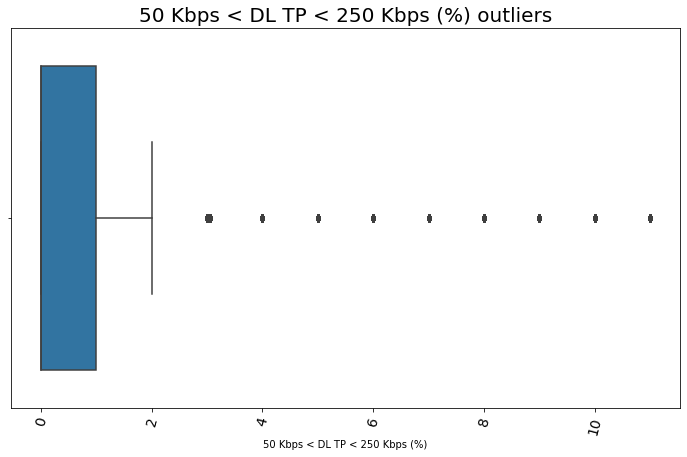

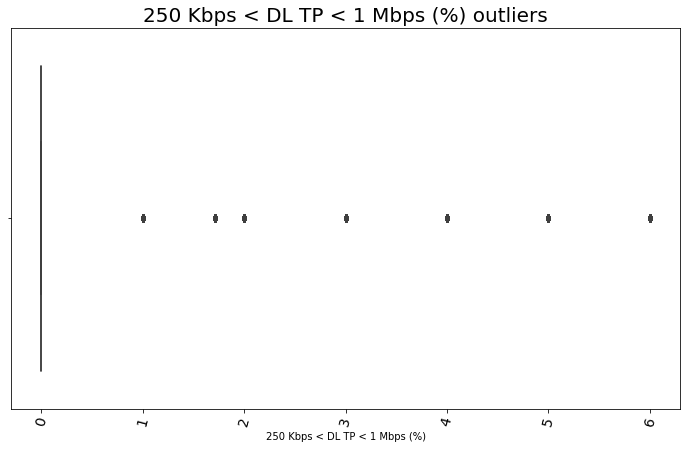

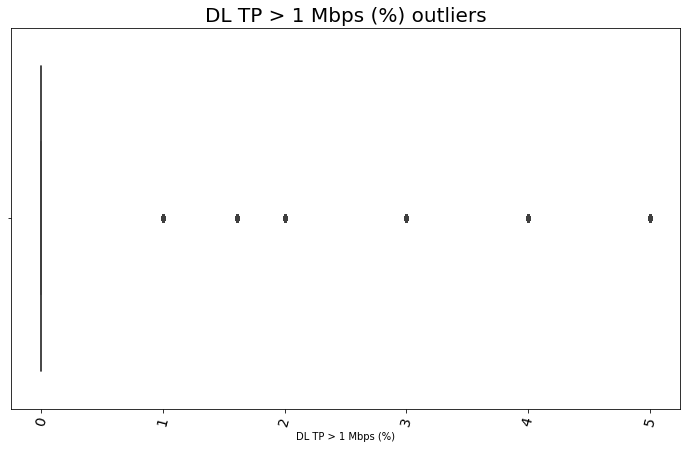

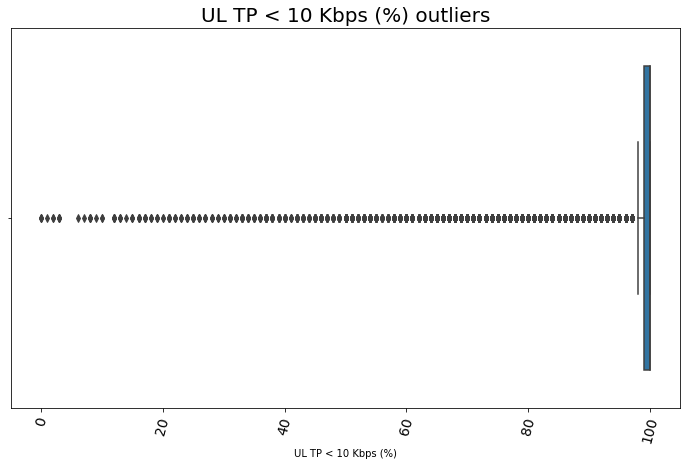

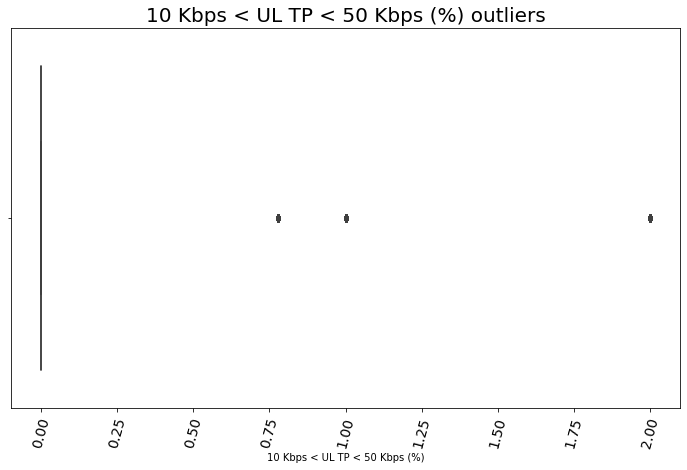

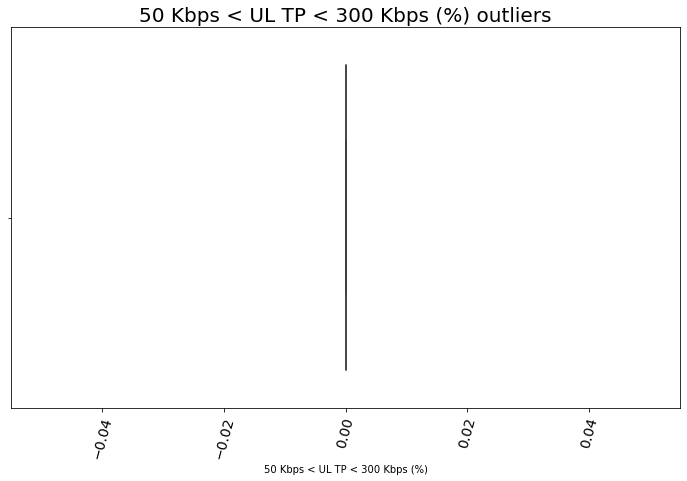

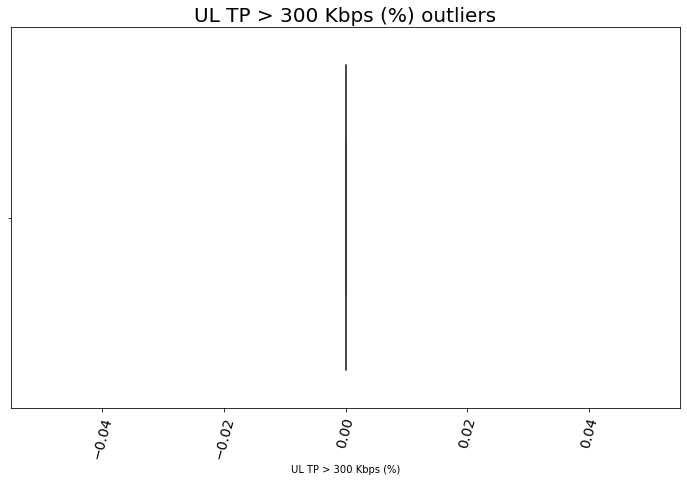

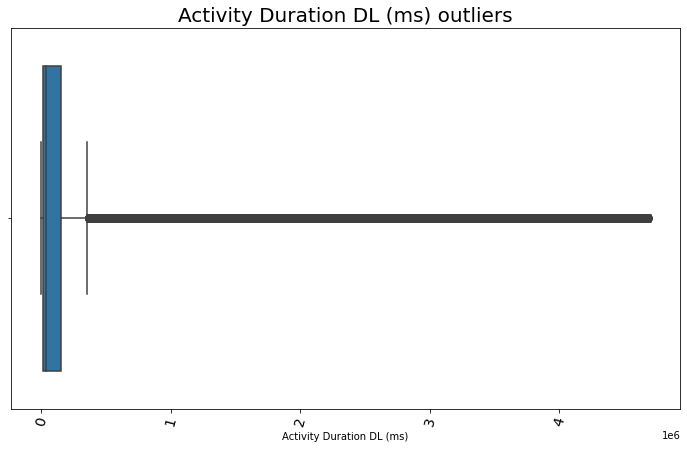

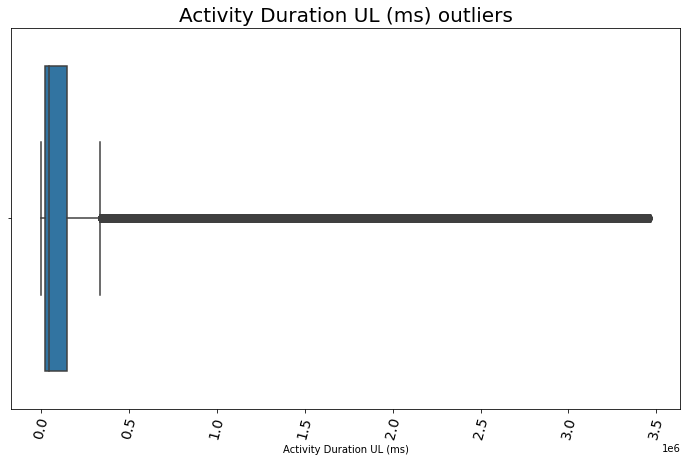

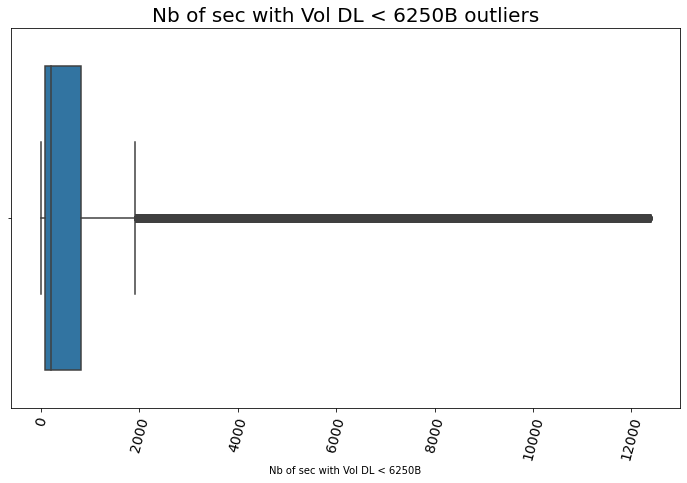

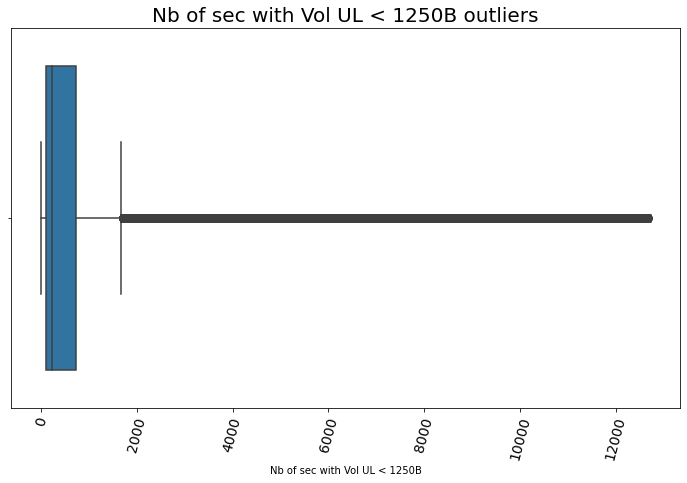

In [14]:
#### Boxplot to visualize the ouliers
for col in dfExp_num.columns:
    eda.plot_box(dfExp_num, col, f'{col} outliers')

Some of the outliers are not fixed but they won't have anymore much influence on the results. Then we can go ahead cause they are much better than previously.

In [15]:
for col in dfExp_num.columns:
    dfExp[col] = dfExp_num[col]

In [16]:
dfExp.columns

Index(['Bearer Id', 'MSISDN/Number', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B'],
      dtype='object')

### Aggregation, per customer, of the following information:
- Average RTT
- Handset type
- Average throughput

Note: Average TCP retransmission had too much missing values. It was dropped.

In [17]:
col = 'MSISDN/Number'
use = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
methods = ['sum', 'sum', 'first', 'sum', 'sum']
dfExp_agg = transf.aggregate(dfExp, col, use, methods)

In [18]:
dfExp_agg

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,"33,601,001,722.00",46.00,0.00,Huawei P20 Lite Huawei Nova 3E,37.00,39.00
1,"33,601,001,754.00",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00
2,"33,601,002,511.00",106.10,17.66,undefined,48.00,49.00
3,"33,601,007,832.00",69.00,15.00,Apple iPhone 5S (A1457),204.00,44.00
4,"33,601,008,617.00",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00
...,...,...,...,...,...,...
106467,"33,789,997,247.00",34.00,6.00,Apple iPhone 8 Plus (A1897),68.00,48.00
106468,"41,906,541,782.21","27,080.02","5,574.16",undefined,"4,982,177.00","412,364.00"
106469,"3,197,020,876,596.00",106.10,17.66,Quectel Wireless. Quectel Ec25-E,1.00,0.00
106470,"337,000,037,000,919.00",106.10,17.66,Huawei B525S-23A,11.00,22.00


In [19]:
dfExp_agg['Avg RTT'] = dfExp_agg['Avg RTT DL (ms)'] + dfExp_agg['Avg RTT UL (ms)']
dfExp_agg['Avg Bearer TP'] = dfExp_agg['Avg Bearer TP DL (kbps)'] + dfExp_agg['Avg Bearer TP UL (kbps)']
dfExp_agg = dfExp_agg.drop(labels=106468, axis=0)

### Compute & list 10 of the top, bottom and most frequent:
 - RTT values in the dataset.
 - Throughput values in the dataset.


In [20]:
dfExp_agg

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT,Avg Bearer TP
0,"33,601,001,722.00",46.00,0.00,Huawei P20 Lite Huawei Nova 3E,37.00,39.00,46.00,76.00
1,"33,601,001,754.00",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00,31.00,99.00
2,"33,601,002,511.00",106.10,17.66,undefined,48.00,49.00,123.77,97.00
3,"33,601,007,832.00",69.00,15.00,Apple iPhone 5S (A1457),204.00,44.00,84.00,248.00
4,"33,601,008,617.00",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00,119.00,"40,497.00"
...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",42.00,10.00,Huawei Honor 9 Lite,"9,978.00",387.00,52.00,"10,365.00"
106467,"33,789,997,247.00",34.00,6.00,Apple iPhone 8 Plus (A1897),68.00,48.00,40.00,116.00
106469,"3,197,020,876,596.00",106.10,17.66,Quectel Wireless. Quectel Ec25-E,1.00,0.00,123.77,1.00
106470,"337,000,037,000,919.00",106.10,17.66,Huawei B525S-23A,11.00,22.00,123.77,33.00


In [21]:
RTT_values = dfExp_agg['Avg RTT'].sort_values(ascending=False)
RTT_top = RTT_values[:10]
RTT_bottom = (dfExp_agg['Avg RTT'].sort_values(ascending=True))[:10]
RTT_most_frequent = RTT_values.mode()

TP_values = dfExp_agg['Avg Bearer TP'].sort_values(ascending=False)
TP_top = TP_values[:10]
TP_bottom = (dfExp_agg['Avg Bearer TP'].sort_values(ascending=True))[:10]
TP_most_frequent = TP_values.mode()

In [22]:
Top_Exp_metrics_values = pd.DataFrame(columns=['RTT_top', 'RTT_bottom', 'RTT_most_frequent', 'TP_top', 'TP_bottom', 'TP_most_frequent'])
Top_Exp_metrics_values['RTT_top'] = list(RTT_top)
Top_Exp_metrics_values['RTT_bottom'] = list(RTT_bottom)
Top_Exp_metrics_values['RTT_most_frequent'] = list(RTT_most_frequent)*10
Top_Exp_metrics_values['TP_top'] = list(TP_top)
Top_Exp_metrics_values['TP_bottom'] = list(TP_bottom)
Top_Exp_metrics_values['TP_most_frequent'] = list(TP_most_frequent)*10
Top_Exp_metrics_values

,RTT_top,RTT_bottom,RTT_most_frequent,TP_top,TP_bottom,TP_most_frequent
0,"1,582.66",0.00,123.77,"268,478.00",0.00,15.00
1,"1,285.13",0.00,123.77,"247,822.00",0.00,15.00
2,"1,204.59",2.00,123.77,"245,210.00",0.00,15.00
3,"1,113.89",4.00,123.77,"238,573.00",0.00,15.00
4,"1,070.83",5.00,123.77,"236,798.00",0.00,15.00
5,"1,062.06",6.00,123.77,"233,742.00",0.00,15.00
6,"1,062.00",7.00,123.77,"230,376.00",0.00,15.00
7,"1,012.06",7.00,123.77,"229,873.00",0.00,15.00
8,999.36,7.00,123.77,"227,310.00",0.00,15.00
9,986.53,8.00,123.77,"225,928.00",0.00,15.00


## Computation of:
 - The distribution of the average throughput per handset type

In [23]:
dfExp_agg2 = dfExp_agg.drop(labels=list(dfExp_agg.loc[dfExp_agg['Handset Type'] == 'undefined'].index), axis=0)
Top5_handsets = list(((dfExp_agg2['Handset Type'].value_counts())[:5]).index)
Top5_handsets

['Huawei B528S-23A',
 'Apple iPhone 6S (A1688)',
 'Apple iPhone 6 (A1586)',
 'Apple iPhone 7 (A1778)',
 'Apple iPhone Se (A1723)']

In [24]:
dist_tp_df = dfExp_agg2.loc[dfExp_agg2['Handset Type'].isin(Top5_handsets)]
dist_tp_df

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT,Avg Bearer TP
1,"33,601,001,754.00",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00,31.00,99.00
4,"33,601,008,617.00",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00,119.00,"40,497.00"
12,"33,601,022,743.00",52.00,1.00,Apple iPhone 6 (A1586),29.00,40.00,53.00,69.00
20,"33,601,034,530.00",108.00,10.00,Apple iPhone 7 (A1778),"7,975.00",748.00,118.00,"8,723.00"
21,"33,601,034,784.00",180.10,29.66,Apple iPhone 6S (A1688),77.00,82.00,209.77,159.00
...,...,...,...,...,...,...,...,...
106449,"33,789,878,384.00",53.00,3.00,Apple iPhone 6 (A1586),"15,743.00",218.00,56.00,"15,961.00"
106453,"33,789,881,186.00",198.00,18.00,Apple iPhone 6 (A1586),152.00,"1,312.00",216.00,"1,464.00"
106457,"33,789,914,536.00",66.00,4.00,Apple iPhone Se (A1723),231.00,323.00,70.00,554.00
106461,"33,789,953,832.00",81.00,10.00,Apple iPhone Se (A1723),86.00,103.00,91.00,189.00


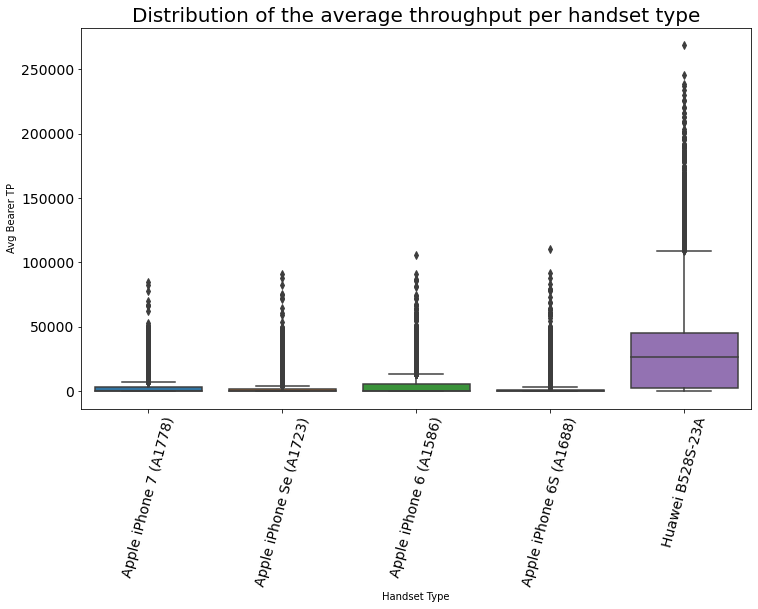

In [25]:
eda.plot_box_multi(dist_tp_df, 'Handset Type', 'Avg Bearer TP', 'Distribution of the average throughput per handset type')
plt.savefig('Distribution TP.png')

### Using the experience metrics above, k-means clustering (where k = 3) to segment users into groups of experiences and brief description of each cluster.

### Processing before kmeans clustering

In [26]:
dfForclust = dfExp_agg.copy()

In [27]:
dfForclust['Handset Type'], lab_Handset = transf.encode(dfForclust, 'Handset Type')

In [28]:
dic_Handset = pd.DataFrame(data= {'Label': list(lab_Handset), 'Code': list(dfForclust['Handset Type'])})

In [29]:
dfForclust

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT,Avg Bearer TP
0,"33,601,001,722.00",46.00,0.00,413,37.00,39.00,46.00,76.00
1,"33,601,001,754.00",30.00,1.00,59,48.00,51.00,31.00,99.00
2,"33,601,002,511.00",106.10,17.66,1390,48.00,49.00,123.77,97.00
3,"33,601,007,832.00",69.00,15.00,44,204.00,44.00,84.00,248.00
4,"33,601,008,617.00",114.00,5.00,73,"40,395.00",102.00,119.00,"40,497.00"
...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",42.00,10.00,376,"9,978.00",387.00,52.00,"10,365.00"
106467,"33,789,997,247.00",34.00,6.00,69,68.00,48.00,40.00,116.00
106469,"3,197,020,876,596.00",106.10,17.66,800,1.00,0.00,123.77,1.00
106470,"337,000,037,000,919.00",106.10,17.66,313,11.00,22.00,123.77,33.00


In [30]:
dfForclust_norm = transf.normalize(dfForclust.drop(['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'], axis=1))
dfForclust_norm

,Handset Type,Avg RTT,Avg Bearer TP
0,-0.16,-0.65,-0.49
1,-0.97,-0.85,-0.48
2,2.05,0.41,-0.48
3,-1.00,-0.13,-0.48
4,-0.94,0.34,1.64
...,...,...,...
106466,-0.25,-0.57,0.06
106467,-0.95,-0.73,-0.48
106469,0.71,0.41,-0.49
106470,-0.39,0.41,-0.49


### k-means (k=3)

In [31]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(dfForclust_norm)

KMeans(max_iter=50, n_clusters=3)

In [32]:
dfForclust_norm.loc[:,'MSISDN/Number'] = dfForclust['MSISDN/Number']
dfForclust_norm

,Handset Type,Avg RTT,Avg Bearer TP,MSISDN/Number
0,-0.16,-0.65,-0.49,"33,601,001,722.00"
1,-0.97,-0.85,-0.48,"33,601,001,754.00"
2,2.05,0.41,-0.48,"33,601,002,511.00"
3,-1.00,-0.13,-0.48,"33,601,007,832.00"
4,-0.94,0.34,1.64,"33,601,008,617.00"
...,...,...,...,...
106466,-0.25,-0.57,0.06,"33,789,996,170.00"
106467,-0.95,-0.73,-0.48,"33,789,997,247.00"
106469,0.71,0.41,-0.49,"3,197,020,876,596.00"
106470,-0.39,0.41,-0.49,"337,000,037,000,919.00"


In [33]:
#Appending the resultant clustering labels in the last column, the view of the data frame.
dfForclust_norm['cluster'] = kmeans.labels_
dfForclust_norm

,Handset Type,Avg RTT,Avg Bearer TP,MSISDN/Number,cluster
0,-0.16,-0.65,-0.49,"33,601,001,722.00",0
1,-0.97,-0.85,-0.48,"33,601,001,754.00",0
2,2.05,0.41,-0.48,"33,601,002,511.00",1
3,-1.00,-0.13,-0.48,"33,601,007,832.00",0
4,-0.94,0.34,1.64,"33,601,008,617.00",0
...,...,...,...,...,...
106466,-0.25,-0.57,0.06,"33,789,996,170.00",0
106467,-0.95,-0.73,-0.48,"33,789,997,247.00",0
106469,0.71,0.41,-0.49,"3,197,020,876,596.00",1
106470,-0.39,0.41,-0.49,"337,000,037,000,919.00",0


In [34]:
dfForclust['cluster'] = dfForclust_norm['cluster']
dfForclust

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT,Avg Bearer TP,cluster
0,"33,601,001,722.00",46.00,0.00,413,37.00,39.00,46.00,76.00,0
1,"33,601,001,754.00",30.00,1.00,59,48.00,51.00,31.00,99.00,0
2,"33,601,002,511.00",106.10,17.66,1390,48.00,49.00,123.77,97.00,1
3,"33,601,007,832.00",69.00,15.00,44,204.00,44.00,84.00,248.00,0
4,"33,601,008,617.00",114.00,5.00,73,"40,395.00",102.00,119.00,"40,497.00",0
...,...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",42.00,10.00,376,"9,978.00",387.00,52.00,"10,365.00",0
106467,"33,789,997,247.00",34.00,6.00,69,68.00,48.00,40.00,116.00,0
106469,"3,197,020,876,596.00",106.10,17.66,800,1.00,0.00,123.77,1.00,1
106470,"337,000,037,000,919.00",106.10,17.66,313,11.00,22.00,123.77,33.00,0


In [35]:
dfForclust['Handset Type'] = list(dic_Handset['Label'])
dfForclust

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT,Avg Bearer TP,cluster
0,"33,601,001,722.00",46.00,0.00,Huawei P20 Lite Huawei Nova 3E,37.00,39.00,46.00,76.00,0
1,"33,601,001,754.00",30.00,1.00,Apple iPhone 7 (A1778),48.00,51.00,31.00,99.00,0
2,"33,601,002,511.00",106.10,17.66,undefined,48.00,49.00,123.77,97.00,1
3,"33,601,007,832.00",69.00,15.00,Apple iPhone 5S (A1457),204.00,44.00,84.00,248.00,0
4,"33,601,008,617.00",114.00,5.00,Apple iPhone Se (A1723),"40,395.00",102.00,119.00,"40,497.00",0
...,...,...,...,...,...,...,...,...,...
106466,"33,789,996,170.00",42.00,10.00,Huawei Honor 9 Lite,"9,978.00",387.00,52.00,"10,365.00",0
106467,"33,789,997,247.00",34.00,6.00,Apple iPhone 8 Plus (A1897),68.00,48.00,40.00,116.00,0
106469,"3,197,020,876,596.00",106.10,17.66,Quectel Wireless. Quectel Ec25-E,1.00,0.00,123.77,1.00,1
106470,"337,000,037,000,919.00",106.10,17.66,Huawei B525S-23A,11.00,22.00,123.77,33.00,0


In [36]:
ag = 'cluster'
usec = ['Avg RTT', 'Avg Bearer TP']
methodsc = [['min', 'max', 'mean', 'sum'], ['min', 'max', 'mean', 'sum']]
dfForclust_clusters = transf.aggregate(dfForclust, ag, usec, methodsc)

In [37]:
clust1_handset_mode = (dfForclust[dfForclust['cluster'] == 0])['Handset Type'].mode()
clust2_handset_mode = (dfForclust[dfForclust['cluster'] == 1])['Handset Type'].mode()
clust3_handset_mode = (dfForclust[dfForclust['cluster'] == 2])['Handset Type'].mode()

print(clust1_handset_mode)
print(clust2_handset_mode)
print(clust3_handset_mode)

0    Huawei B528S-23A
dtype: object
0    undefined
dtype: object
0    Huawei B528S-23A
dtype: object


In [38]:
clust_RTT = dfForclust_clusters['Avg RTT']
clust_RTT

,min,max,mean,sum
0,0.00,306.00,67.92,"4,149,190.12"
1,7.00,371.30,105.78,"4,182,216.26"
2,60.00,"1,582.66",282.96,"1,655,022.88"


In [39]:
clust_TP = dfForclust_clusters['Avg Bearer TP']
clust_TP

,min,max,mean,sum
0,0.00,"62,628.00","6,911.29","422,176,396.00"
1,0.00,"66,071.00","5,534.61","218,821,839.00"
2,11.00,"268,478.00","59,993.71","350,903,216.00"


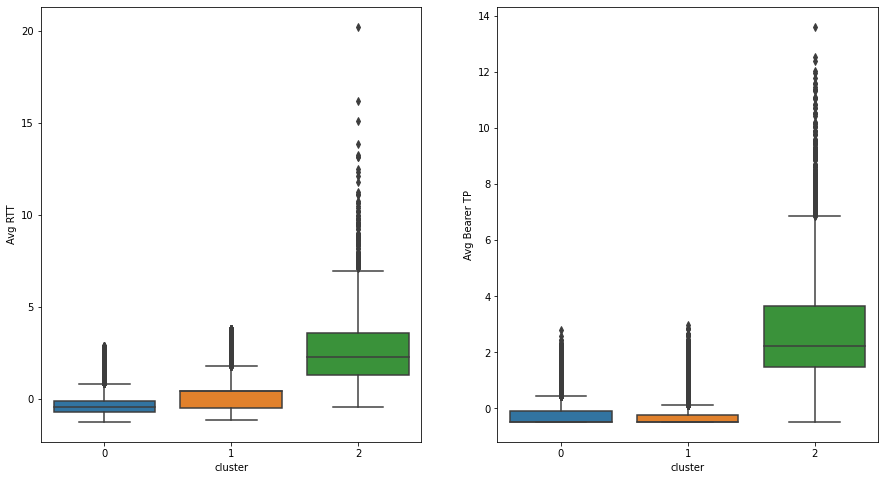

In [40]:
metrs = ['Avg RTT', 'Avg Bearer TP']
plt.figure(figsize=(15, 8))
for i in range(len(metrs)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='cluster', y=metrs[i], data=dfForclust_norm)
plt.savefig('Experience Cluster.png')

In [41]:
pwd

'/home/jds98/10 Academy/Week 1/Week-1-Project/notebooks/Figures'

In [42]:
cd ../../data/

/home/jds98/10 Academy/Week 1/Week-1-Project/data


In [43]:
Top_Exp_metrics_values.to_csv('Experience_metrics_top_values.csv', index=False)
dfForclust.to_csv('Experience_metrics_clusters_data.csv', index=False)